## EEG Classification Model

# 1 Data Preprocessing

In [ ]:
import numpy as np
import os
import glob
import matplotlib.pyplot as plt

In [ ]:
dir_path = './fda project 3 data/'

In [ ]:
# Function for load EEG data from a set of files
def load_eeg_data(path):
    eeg_data = []
    file_names = os.listdir(path)
    file_names.sort()
    for file_name in file_names:
        file_path = os.path.join(path, file_name)
        with open(file_path, 'r') as file:
            # Converting the data to integers
            data = [int(line.strip()) for line in file.readlines()]
            eeg_data.append(data)
    return np.array(eeg_data)

set_f_path = os.path.join(dir_path, 'f')
eeg_data_set_f = load_eeg_data(set_f_path)
eeg_data_set_n = load_eeg_data(os.path.join(dir_path, 'n'))
eeg_data_set_o = load_eeg_data(os.path.join(dir_path, 'o'))
eeg_data_set_s = load_eeg_data(os.path.join(dir_path, 's'))
eeg_data_set_z = load_eeg_data(os.path.join(dir_path, 'z'))




In [ ]:
# Finding the shape of the loaded data
print('Shape of EEG Data for Set F:')
print(eeg_data_set_f.shape)
print('\nShape of EEG Data for Set N:')
print(eeg_data_set_n.shape)
print('\nShape of EEG Data for Set O:')
print(eeg_data_set_o.shape)
print('\nShape of EEG Data for Set S:')
print(eeg_data_set_s.shape)
print('\nShape of EEG Data for Set Z:')
print(eeg_data_set_z.shape)

Shape of EEG Data for Set F:
(100, 4097)

Shape of EEG Data for Set N:
(100, 4097)

Shape of EEG Data for Set O:
(100, 4097)

Shape of EEG Data for Set S:
(100, 4097)

Shape of EEG Data for Set Z:
(100, 4097)


In [ ]:
import pandas as pd

# List of EEG datasets and their names
eeg_datasets = [eeg_data_set_f, eeg_data_set_n, eeg_data_set_o, eeg_data_set_s, eeg_data_set_z]
dataset_names = ['Set F', 'Set N', 'Set O', 'Set S', 'Set Z']

# Loop through each dataset and print the statistical summary
for dataset, name in zip(eeg_datasets, dataset_names):
    eeg_df = pd.DataFrame(dataset)
    print(f"\nStatistical Summary for EEG Data {name}:")
    print(eeg_df.describe().round(2))



Statistical Summary for EEG Data Set F:
         0       1       2       3       4       5       6       7       8     \
count  100.00  100.00  100.00  100.00  100.00  100.00  100.00  100.00  100.00   
mean     3.50    3.12    4.15    5.70    8.57   10.51   12.28   11.75   11.74   
std     61.70   63.58   65.52   70.53   77.85   85.40   89.11   88.66   87.46   
min   -263.00 -263.00 -261.00 -258.00 -258.00 -251.00 -241.00 -236.00 -240.00   
25%    -29.00  -31.25  -34.25  -29.75  -31.25  -38.25  -32.50  -31.00  -28.50   
50%      5.00    2.00    3.50    8.00    7.50    6.00    5.50    0.00    2.50   
75%     43.25   43.00   41.75   43.25   43.50   43.00   44.25   40.50   41.50   
max    163.00  164.00  168.00  196.00  329.00  459.00  494.00  440.00  332.00   

         9     ...    4087    4088    4089    4090    4091    4092    4093  \
count  100.00  ...  100.00  100.00  100.00  100.00  100.00  100.00  100.00   
mean    11.34  ...  -10.02   -7.75   -6.38   -4.49   -3.65   -1.54   -1.1

In [ ]:
import pandas as pd

# NumPy array converted individually to a Pandas DataFrame
eeg_df_f = pd.DataFrame(eeg_data_set_f)
eeg_df_n = pd.DataFrame(eeg_data_set_n)
eeg_df_o = pd.DataFrame(eeg_data_set_o)
eeg_df_s = pd.DataFrame(eeg_data_set_s)
eeg_df_z = pd.DataFrame(eeg_data_set_z)

# Display the head of each DataFrame
print("EEG Data Set F :")
print(eeg_df_f.head())
print("\nEEG Data Set N :")
print(eeg_df_n.head())
print("\nEEG Data Set O :")
print(eeg_df_o.head())
print("\nEEG Data Set S :")
print(eeg_df_s.head())
print("\nEEG Data Set Z :")
print(eeg_df_z.head())


EEG Data Set F :
   0     1     2     3     4     5     6     7     8     9     ...  4087  \
0    34    33    28    22    21    22    22    19    22    18  ...    21   
1    60    47    38    29    28    30    28    30    36    51  ...   546   
2    26    16    13    12    17    16     7    -6   -19   -25  ...    56   
3   -41   -42   -48   -48   -48   -45   -44   -36   -42   -43  ...    -4   
4    13     6    -1   -13   -29   -42   -53   -71   -86   -94  ...   -75   

   4088  4089  4090  4091  4092  4093  4094  4095  4096  
0    24    15    22    31    40    45    39    41     7  
1   450   366   296   248   209   177   149   126    42  
2    70    77    86    99   113   119   114    99  -130  
3    -4   -11   -13   -15   -23   -28   -30   -23   -13  
4   -37    36    86   139   167   175   161   129     1  

[5 rows x 4097 columns]

EEG Data Set N :
   0     1     2     3     4     5     6     7     8     9     ...  4087  \
0   -42   -39   -35   -35   -36   -37   -37   -39   -36   -

In [ ]:
# Finding missing and anomalous values
def check_missing_values(data):
    # Finding NaN and large values to traceate missing or corrupt data
    nan_count = np.isnan(data).sum()
    extreme_values_count = np.sum(np.abs(data) > 1e6)
    return nan_count, extreme_values_count

missing_values_count_f, extreme_values_count_f = check_missing_values(eeg_data_set_f)
missing_values_count_n, extreme_values_count_n = check_missing_values(eeg_data_set_n)
missing_values_count_o, extreme_values_count_o = check_missing_values(eeg_data_set_o)
missing_values_count_s, extreme_values_count_s = check_missing_values(eeg_data_set_s)
missing_values_count_z, extreme_values_count_z = check_missing_values(eeg_data_set_z)

# Results for the above
print('Missing values and extreme values count for set F:')
print(missing_values_count_f, extreme_values_count_f)
print('\nMissing values and extreme values count for set N:')
print(missing_values_count_n, extreme_values_count_n)
print('\nMissing values and extreme values count for set O:')
print(missing_values_count_o, extreme_values_count_o)
print('\nMissing values and extreme values count for set S:')
print(missing_values_count_s, extreme_values_count_s)
print('\nMissing values and extreme values count for set Z:')
print(missing_values_count_z, extreme_values_count_z)

Missing values and extreme values count for set F:
0 0

Missing values and extreme values count for set N:
0 0

Missing values and extreme values count for set O:
0 0

Missing values and extreme values count for set S:
0 0

Missing values and extreme values count for set Z:
0 0


In [ ]:
from scipy.signal import butter, filtfilt

# Function to apply a bandpass filter
def bandpass_filter(data, lowcut, highcut, fs, order=5):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    filtered_data = filtfilt(b, a, data)
    return filtered_data

# Bandpass filter applied to each EEG recording in every set with a sampling rate (fs) of 256 Hz
fs = 256
lowcut = 1.0  # Low cut-off frequency (Hz)
highcut = 50.0  # High cut-off frequency (Hz)

filtered_eeg_data_set_f = np.array([bandpass_filter(data, lowcut, highcut, fs) for data in eeg_data_set_f])
filtered_eeg_data_set_n = np.array([bandpass_filter(data, lowcut, highcut, fs) for data in eeg_data_set_n])
filtered_eeg_data_set_o = np.array([bandpass_filter(data, lowcut, highcut, fs) for data in eeg_data_set_o])
filtered_eeg_data_set_s = np.array([bandpass_filter(data, lowcut, highcut, fs) for data in eeg_data_set_s])
filtered_eeg_data_set_z = np.array([bandpass_filter(data, lowcut, highcut, fs) for data in eeg_data_set_z])

# Finding the shape of the filtered data
print('Shape of Filtered EEG Data for Set F:')
print(filtered_eeg_data_set_f.shape)
print('\nShape of Filtered EEG Data for Set N:')
print(filtered_eeg_data_set_n.shape)
print('\nShape of Filtered EEG Data for Set O:')
print(filtered_eeg_data_set_o.shape)
print('\nShape of Filtered EEG Data for Set S:')
print(filtered_eeg_data_set_s.shape)
print('\nShape of Filtered EEG Data for Set Z:')
print(filtered_eeg_data_set_z.shape)


Shape of Filtered EEG Data for Set F:
(100, 4097)

Shape of Filtered EEG Data for Set N:
(100, 4097)

Shape of Filtered EEG Data for Set O:
(100, 4097)

Shape of Filtered EEG Data for Set S:
(100, 4097)

Shape of Filtered EEG Data for Set Z:
(100, 4097)


In [ ]:
from sklearn.preprocessing import StandardScaler

# Normalizing EEG data
def normalize_data(data):
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data)
    return scaled_data

# Normalizing filtered EEG data
normalized_eeg_data_set_f = normalize_data(filtered_eeg_data_set_f)
normalized_eeg_data_set_n = normalize_data(filtered_eeg_data_set_n)
normalized_eeg_data_set_o = normalize_data(filtered_eeg_data_set_o)
normalized_eeg_data_set_s = normalize_data(filtered_eeg_data_set_s)
normalized_eeg_data_set_z = normalize_data(filtered_eeg_data_set_z)

# Finding mean and standard deviation of the above calculated normalized data
mean_normalized_f = np.mean(normalized_eeg_data_set_f)
std_normalized_f = np.std(normalized_eeg_data_set_f)

mean_normalized_n = np.mean(normalized_eeg_data_set_n)
std_normalized_n = np.std(normalized_eeg_data_set_n)

mean_normalized_o = np.mean(normalized_eeg_data_set_o)
std_normalized_o = np.std(normalized_eeg_data_set_o)

mean_normalized_s = np.mean(normalized_eeg_data_set_s)
std_normalized_s = np.std(normalized_eeg_data_set_s)

mean_normalized_z = np.mean(normalized_eeg_data_set_z)
std_normalized_z = np.std(normalized_eeg_data_set_z)

print('Mean (Normalized Data): Average value of a dataset after normalization, typically converging around 0 in a standardized dataset.')

print('Standard Deviation (Normalized Data): Measure of the amount of variation or dispersion in a set of values, which is normalized to be around 1 in a standardized dataset.')

print('Mean and Standardized data for Set F:')
print(mean_normalized_f,';', std_normalized_f)
print('\nMean and Standardized data for Set N:')
print(mean_normalized_n,';', std_normalized_n)
print('\nMean and Standardized data for Set O:')
print(mean_normalized_o,';', std_normalized_o)
print('\nMean and Standardized data for Set S:')
print(mean_normalized_s,';', std_normalized_s)
print('\nMean and Standardized data for Set Z:')
print(mean_normalized_z,';', std_normalized_z)


Mean (Normalized Data): Average value of a dataset after normalization, typically converging around 0 in a standardized dataset.
Standard Deviation (Normalized Data): Measure of the amount of variation or dispersion in a set of values, which is normalized to be around 1 in a standardized dataset.
Mean and Standardized data for Set F:
2.954271763354517e-18 ; 0.9999999999999997

Mean and Standardized data for Set N:
1.0405800377253115e-19 ; 0.9999999999999999

Mean and Standardized data for Set O:
-4.769325172907678e-20 ; 1.0

Mean and Standardized data for Set S:
1.0926090396115771e-18 ; 1.0

Mean and Standardized data for Set Z:
-1.821015066019295e-19 ; 0.9999999999999998


In [ ]:
# Augmenting data by adding random noise
def augment_data_with_noise(data, noise_level=0.01):
    augmented_data = []
    for sample in data:
        noise = np.random.normal(0, noise_level, sample.shape)
        augmented_sample = sample + noise
        augmented_data.append(augmented_sample)
    return np.array(augmented_data)

# Augmenting the normalized EEG data with random noise
augmented_eeg_data_set_f = augment_data_with_noise(normalized_eeg_data_set_f)
augmented_eeg_data_set_n = augment_data_with_noise(normalized_eeg_data_set_n)
augmented_eeg_data_set_o = augment_data_with_noise(normalized_eeg_data_set_o)
augmented_eeg_data_set_s = augment_data_with_noise(normalized_eeg_data_set_s)
augmented_eeg_data_set_z = augment_data_with_noise(normalized_eeg_data_set_z)

# Finding shape of augmented data
print('Shape of Augmented data for set F:')
print(augmented_eeg_data_set_f.shape)
print('\nShape of Augmented data for set N:')
print(augmented_eeg_data_set_n.shape)
print('\nShape of Augmented data for set O:')
print(augmented_eeg_data_set_o.shape)
print('\nShape of Augmented data for set S:')
print(augmented_eeg_data_set_s.shape)
print('\nShape of Augmented data for set Z:')
print(augmented_eeg_data_set_z.shape)


Shape of Augmented data for set F:
(100, 4097)

Shape of Augmented data for set N:
(100, 4097)

Shape of Augmented data for set O:
(100, 4097)

Shape of Augmented data for set S:
(100, 4097)

Shape of Augmented data for set Z:
(100, 4097)


# 2 Feature Extraction

In [ ]:
# Feature Extraction

import numpy as np
import scipy.stats
from scipy.signal import welch

# Time-Domain Feature Extraction
def extract_time_domain_features(data):
    means = np.mean(data, axis=1)
    medians = np.median(data, axis=1)
    stds = np.std(data, axis=1)
    variances = np.var(data, axis=1)
    skews = scipy.stats.skew(data, axis=1)
    kurtoses = scipy.stats.kurtosis(data, axis=1)
    return np.column_stack((means, medians, stds, variances, skews, kurtoses))

# Frequency-Domain Feature Extraction
def extract_frequency_domain_features(data, fs):
    psd_features = []
    for sample in data:
        freqs, psd = welch(sample, fs=fs)
        band_power = np.sum(psd)  # Total power in PSD
        peak_freq = freqs[np.argmax(psd)]
        spectral_entropy = scipy.stats.entropy(psd)
        psd_features.append([band_power, peak_freq, spectral_entropy])
    return np.array(psd_features)

fs = 256  # Sampling frequency is 256 Hz

# Extracting Time-Domain Features
time_features = extract_time_domain_features(augmented_eeg_data_set_f)

# Extracting Frequency-Domain Features
freq_features = extract_frequency_domain_features(augmented_eeg_data_set_f, fs)

# Combining the obtained Time-Domain and Frequency-Domain Features
combined_features = np.hstack((time_features, freq_features))

In [ ]:
# The following is an array comprising list of EEG datasets
eeg_datasets = [eeg_data_set_f, eeg_data_set_n, eeg_data_set_o, eeg_data_set_s, eeg_data_set_z]

# Initializing an empty list to store combined features for above mentioned datasets
all_combined_features = []

# Iterating through every EEG dataset and extracting respective features
for dataset in eeg_datasets:
    # Extracting Time-Domain Features
    time_features = extract_time_domain_features(dataset)

    # Extracting Frequency-Domain Features
    freq_features = extract_frequency_domain_features(dataset, fs)

    # Combining Time-Domain and Frequency-Domain Features
    combined_features = np.hstack((time_features, freq_features))

    # Appending the combined features to the list
    all_combined_features.append(combined_features)

features_set_f = all_combined_features[0]
features_set_n = all_combined_features[1]
features_set_o = all_combined_features[2]
features_set_s = all_combined_features[3]
features_set_z = all_combined_features[4]

Processing Set F...

Time Features for Set F:
 [[ 2.85704174e+01  2.90000000e+01  2.86250705e+01  8.19394663e+02
   8.36471668e-02 -1.80720319e-01]
 [ 3.17783744e+01  2.60000000e+01  1.33475722e+02  1.78157683e+04
   2.18407608e+00  8.93430826e+00]
 [-2.50158653e+01 -2.70000000e+01  7.19580906e+01  5.17796680e+03
   4.98461334e-02 -2.54974307e-01]
 [-3.52521357e+01 -3.50000000e+01  3.78015725e+01  1.42895888e+03
  -1.40660495e-01  3.33399817e-01]
 [-1.55506468e+01 -2.50000000e+01  8.42852760e+01  7.10400775e+03
   3.15461654e-01  9.61182123e-01]
 [-3.36912375e+01 -3.40000000e+01  2.28676105e+01  5.22927609e+02
  -8.66803364e-02  7.35681382e-02]
 [-2.76573102e+01 -2.80000000e+01  3.87182763e+01  1.49910492e+03
   9.22945000e-02  9.05920847e-01]
 [-1.74644862e+01 -2.10000000e+01  1.03713179e+02  1.07564235e+04
   2.36030139e+00  1.08570553e+01]
 [-6.31681718e+00 -1.46000000e+02  4.40017476e+02  1.93615379e+05
   2.88326008e+00  8.97125741e+00]
 [ 2.69028557e+01  2.30000000e+01  1.3888854

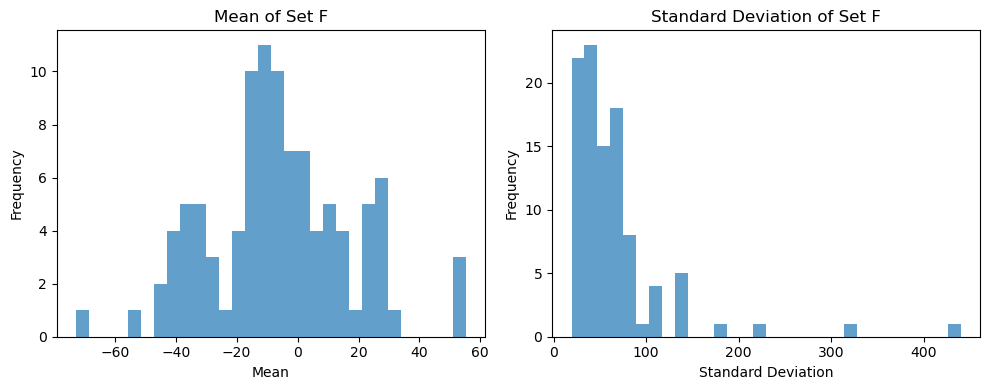

Processing Set N...

Time Features for Set N:
 [[-1.77900903e+01 -1.50000000e+01  4.93273412e+01  2.43318659e+03
  -3.33300048e-01  5.84344133e-01]
 [-9.76324140e-02  1.00000000e+00  6.68258129e+01  4.46568927e+03
  -4.38975339e-02  8.02140635e-01]
 [-1.47132048e+01 -1.30000000e+01  4.57332099e+01  2.09152649e+03
  -1.90354722e-01  5.71638152e-01]
 [ 2.79799854e+01  2.90000000e+01  4.63228221e+01  2.14580385e+03
   1.08581358e-01  6.36807159e-01]
 [ 8.33634367e+00 -3.00000000e+00  1.25020374e+02  1.56300939e+04
   4.47463152e-01  6.03241600e-01]
 [ 1.20912863e+01  1.40000000e+01  5.55788934e+01  3.08901339e+03
  -3.48184100e-01  1.25855212e+00]
 [-4.08933366e+00 -7.00000000e+00  4.77280641e+01  2.27796810e+03
   1.82599267e-01  3.36476215e-01]
 [-3.78601416e+01 -3.70000000e+01  3.87050167e+01  1.49807832e+03
  -4.67726988e-01  7.98406722e-01]
 [ 2.78830852e+01  2.50000000e+01  6.30370429e+01  3.97366878e+03
   1.62571874e-01  6.24026993e-01]
 [-7.31022700e+00 -6.00000000e+00  3.5941022

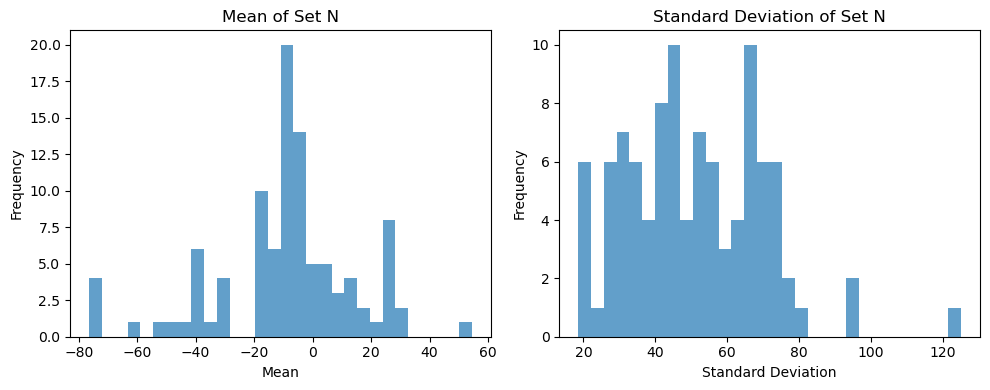

Processing Set O...

Time Features for Set O:
 [[ 5.15694411e+00  4.00000000e+00  5.05308024e+01  2.55336199e+03
   1.51828741e-01  6.09255561e-01]
 [ 8.33365877e+00  7.00000000e+00  4.77237057e+01  2.27755208e+03
   1.59051008e-01  2.00656246e-01]
 [-3.06712228e+00  1.00000000e+00  5.77701516e+01  3.33739042e+03
  -3.03233449e-01  3.38421444e-01]
 [ 8.91652429e+00  1.00000000e+01  6.49889186e+01  4.22355954e+03
  -1.93802023e-01  1.65022977e-01]
 [-4.03758848e+00 -5.00000000e+00  5.64195514e+01  3.18316578e+03
  -6.37103746e-02  3.16272328e-01]
 [ 5.67944838e+01  5.60000000e+01  5.18749857e+01  2.69101415e+03
   2.57642515e-01  7.91078662e-01]
 [-1.95860386e+01 -1.90000000e+01  8.53388341e+01  7.28271660e+03
   1.10058495e-01  1.55185293e-01]
 [ 9.42201611e+00  9.00000000e+00  5.06159072e+01  2.56197006e+03
  -1.40980910e-01  3.32852343e-01]
 [ 1.11757383e+01  1.20000000e+01  6.35232876e+01  4.03520807e+03
  -1.15128193e-01  1.50366010e-01]
 [ 5.90602880e+00  4.00000000e+00  9.1432307

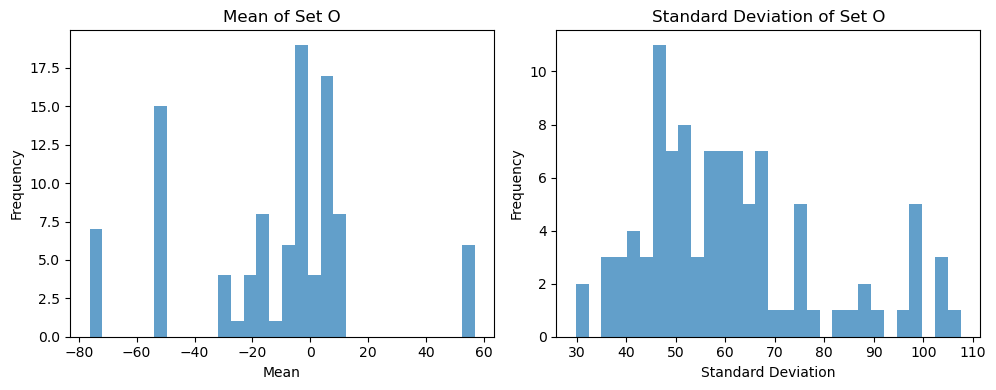

Processing Set S...

Time Features for Set S:
 [[ 4.71000732e+01  1.87000000e+02  4.78484847e+02  2.28947749e+05
  -1.34775823e+00  1.49251746e+00]
 [ 3.75718819e+01  1.16000000e+02  5.05060930e+02  2.55086543e+05
  -6.74033914e-01  2.70036028e-01]
 [ 3.04935319e+01  8.30000000e+01  3.74077172e+02  1.39933731e+05
  -4.68130248e-01  7.40108661e-01]
 [ 7.08713693e+00  1.00000000e+01  1.59833074e+02  2.55466116e+04
   4.68799613e-02 -6.91801022e-01]
 [ 1.28703930e+01  8.30000000e+01  3.32455418e+02  1.10526605e+05
  -4.72756613e-01 -7.03073004e-01]
 [-5.80082988e+00 -1.60000000e+01  1.26220083e+02  1.59315093e+04
   2.43697804e-01 -3.00227428e-01]
 [ 9.45008543e+00  3.90000000e+01  2.48481829e+02  6.17432194e+04
  -7.05822321e-01  2.98988569e+00]
 [-5.03649011e+01 -8.50000000e+01  4.04896607e+02  1.63941262e+05
   2.60539819e-01 -8.36327611e-01]
 [-3.34715646e+01 -1.12000000e+02  3.32262156e+02  1.10398140e+05
   8.23935797e-01  2.11878918e-01]
 [-1.74200635e+01  5.80000000e+01  5.4748793

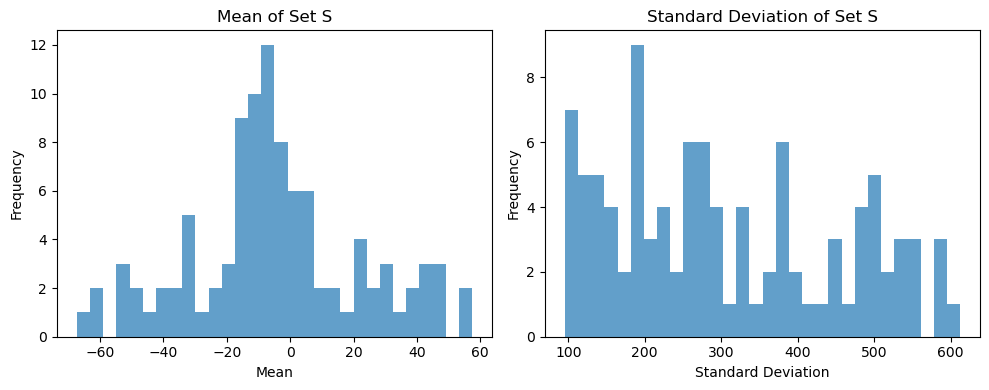

Processing Set Z...

Time Features for Set Z:
 [[ 6.81645106e+00  7.00000000e+00  4.25907235e+01  1.81396973e+03
  -1.82131342e-01  5.41093317e-01]
 [-5.24447156e+01 -5.10000000e+01  4.88126677e+01  2.38267653e+03
  -9.27149921e-02  6.25603045e-01]
 [ 1.27051501e+01  1.30000000e+01  4.71447892e+01  2.22263115e+03
  -4.09990842e-03  1.56414400e-01]
 [-3.99243349e+00 -4.00000000e+00  4.70723164e+01  2.21580297e+03
   6.36775132e-02  1.85732365e-01]
 [-1.79992678e+01 -1.80000000e+01  4.49109579e+01  2.01699414e+03
   1.42753373e-01  3.97312337e-01]
 [-2.78230412e+01 -2.80000000e+01  4.50227147e+01  2.02704484e+03
   2.50118176e-03  1.90062428e-01]
 [-1.33346351e+01 -1.30000000e+01  4.62594328e+01  2.13993513e+03
   3.17868328e-03  1.70541423e-01]
 [-5.65389309e+00 -5.00000000e+00  3.23421241e+01  1.04601299e+03
  -2.35966539e-02  1.62848731e-01]
 [ 8.20087869e+00  9.00000000e+00  3.14782477e+01  9.90880077e+02
  -2.42603172e-03 -1.90100413e-02]
 [-2.73695387e+01 -2.90000000e+01  4.3700314

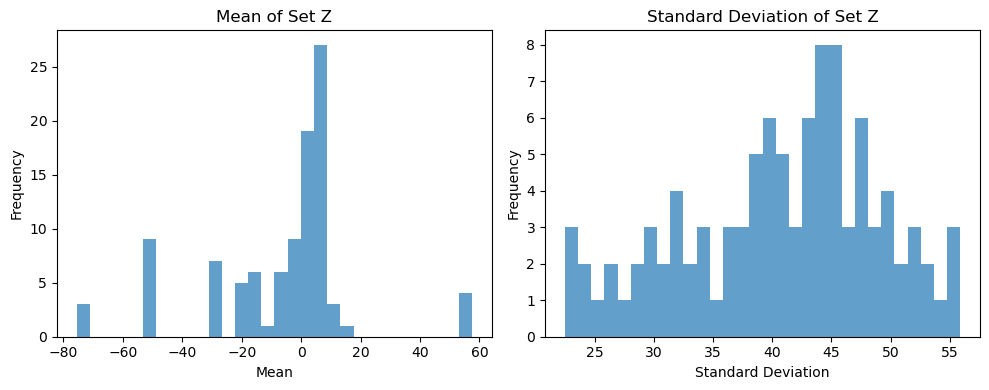

In [ ]:
# Feature Extraction and Visualization

import matplotlib.pyplot as plt

# Define dataset names for easy identification
dataset_names = ['Set F', 'Set N', 'Set O', 'Set S', 'Set Z']

# Iterate through each EEG dataset, extract features, and visualize
for i, dataset in enumerate(eeg_datasets):
    print(f"Processing {dataset_names[i]}...")

    # Extract Time-Domain Features
    time_features = extract_time_domain_features(dataset)
    print(f'\nTime Features for {dataset_names[i]}:\n', time_features)

    # Extract Frequency-Domain Features
    freq_features = extract_frequency_domain_features(dataset, fs)
    print(f'\nFrequency Features for {dataset_names[i]}:\n', freq_features)

    # Combine Time-Domain and Frequency-Domain Features
    combined_features = np.hstack((time_features, freq_features))
    all_combined_features.append(combined_features)
    print(f'\nAll Features for {dataset_names[i]}:\n', all_combined_features)


      # Example visualization: Mean and Standard Deviation
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.title(f'Mean of {dataset_names[i]}')
    plt.hist(time_features[:, 0], bins=30, alpha=0.7)
    plt.xlabel('Mean')
    plt.ylabel('Frequency')

    plt.subplot(1, 2, 2)
    plt.title(f'Standard Deviation of {dataset_names[i]}')
    plt.hist(time_features[:, 2], bins=30, alpha=0.7)
    plt.xlabel('Standard Deviation')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()



# 3 Data Splitting

In [ ]:
import scipy.stats
from scipy.fft import rfft
from scipy.signal import welch

# Extracting time-domain features
def extract_time_domain_features(data):
    # Initializing lists to store features
    means, medians, stds, variances, skews, kurtoses = [], [], [], [], [], []

    for sample in data:
        means.append(np.mean(sample))
        medians.append(np.median(sample))
        stds.append(np.std(sample))
        variances.append(np.var(sample))
        skews.append(scipy.stats.skew(sample))
        kurtoses.append(scipy.stats.kurtosis(sample))

    return np.array([means, medians, stds, variances, skews, kurtoses]).T

# Using Hjorth parameters function
def extract_hjorth_parameters(data):
    activity = np.var(data, axis=1)
    mobility = np.sqrt(np.var(np.gradient(data, axis=1), axis=1) / activity)
    complexity = np.sqrt(np.var(np.gradient(np.gradient(data, axis=1), axis=1), axis=1) / np.var(np.gradient(data, axis=1), axis=1)) / mobility
    return np.array([activity, mobility, complexity]).T

# Using Power Spectral Density to extract frequency-domain features
def extract_frequency_domain_features(data, fs):
    psd_features = []
    for sample in data:
        freqs, psd = welch(sample, fs)
        psd_features.append(psd)
    return np.array(psd_features)

# Extracting the required features
time_domain_features_f = extract_time_domain_features(augmented_eeg_data_set_f)
hjorth_parameters_f = extract_hjorth_parameters(augmented_eeg_data_set_f)
frequency_domain_features_f = extract_frequency_domain_features(augmented_eeg_data_set_f, fs)

time_domain_features_n = extract_time_domain_features(augmented_eeg_data_set_n)
hjorth_parameters_n = extract_hjorth_parameters(augmented_eeg_data_set_n)
frequency_domain_features_n = extract_frequency_domain_features(augmented_eeg_data_set_n, fs)

time_domain_features_o = extract_time_domain_features(augmented_eeg_data_set_o)
hjorth_parameters_o = extract_hjorth_parameters(augmented_eeg_data_set_o)
frequency_domain_features_o = extract_frequency_domain_features(augmented_eeg_data_set_o, fs)

time_domain_features_s = extract_time_domain_features(augmented_eeg_data_set_s)
hjorth_parameters_s = extract_hjorth_parameters(augmented_eeg_data_set_s)
frequency_domain_features_s = extract_frequency_domain_features(augmented_eeg_data_set_s, fs)

time_domain_features_z = extract_time_domain_features(augmented_eeg_data_set_z)
hjorth_parameters_z = extract_hjorth_parameters(augmented_eeg_data_set_z)
frequency_domain_features_z = extract_frequency_domain_features(augmented_eeg_data_set_z, fs)


# Combining the obtained features for each set
combined_features_f = np.hstack((time_domain_features_f, hjorth_parameters_f, frequency_domain_features_f))
combined_features_n = np.hstack((time_domain_features_n, hjorth_parameters_n, frequency_domain_features_n))
combined_features_o = np.hstack((time_domain_features_o, hjorth_parameters_o, frequency_domain_features_o))
combined_features_s = np.hstack((time_domain_features_s, hjorth_parameters_s, frequency_domain_features_s))
combined_features_z = np.hstack((time_domain_features_z, hjorth_parameters_z, frequency_domain_features_z))

non_seizure=np.vstack((combined_features_f,combined_features_n,combined_features_o,combined_features_z))
seizure=combined_features_s

In [ ]:
non_seizure=np.vstack((combined_features_f,combined_features_n,combined_features_o,combined_features_z))
seizure=combined_features_s

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# 0 is for non_seizure
# 1 is for seizure
non_seizure_labels = np.zeros(non_seizure.shape[0])
seizure_labels = np.ones(seizure.shape[0])

# Features and labels combined
X = np.vstack((non_seizure, seizure))
y = np.concatenate((non_seizure_labels, seizure_labels))

# Encoding the labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Splitting the data : train set and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Finding the shape : train set and test sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((400, 138), (100, 138), (400,), (100,))

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Initializing the choosen models
logistic_model = LogisticRegression()
random_forest_model = RandomForestClassifier()
svm_model = SVC()
knn_model = KNeighborsClassifier()


In [ ]:
# Training choosen models
logistic_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)


KNeighborsClassifier()

In [ ]:
# Splitting of data into three subsets

from sklearn.model_selection import train_test_split

# 'X' is your feature set and 'y' is the label set

# Spliting data into training and (validation + test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)

# Spliting the (validation + test) into separate validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Finding the shape of the datasets
print("Shape of Training Set:", X_train.shape, y_train.shape)
print("Shape of Validation Set:", X_val.shape, y_val.shape)
print("Shape of Test Set:", X_test.shape, y_test.shape)


Shape of Training Set: (300, 138) (300,)
Shape of Validation Set: (100, 138) (100,)
Shape of Test Set: (100, 138) (100,)


# 4 Model Selection:

In [ ]:
# We have choosen CNN Implementation for Model Selection using Tensorflow and Keras
# Reason: They can capture spatial relationships in the data and effective in the spatial arrangement of the data points such as the data we are considering now

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, MaxPooling1D

# Assuming each EEG sample has a shape of (n_timesteps, n_features)
n_timesteps, n_features = X_train.shape[1], 1

model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps, n_features)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))






Epoch 1/10


10/10 [==============================] - 2s 54ms/step - loss: 0.5826 - accuracy: 0.7267 - val_loss: 0.4324 - val_accuracy: 0.8400
Epoch 2/10
10/10 [==============================] - 0s 9ms/step - loss: 0.5072 - accuracy: 0.8067 - val_loss: 0.4185 - val_accuracy: 0.8400
Epoch 3/10
10/10 [==============================] - 0s 9ms/step - loss: 0.4624 - accuracy: 0.8067 - val_loss: 0.4107 - val_accuracy: 0.8400
Epoch 4/10
10/10 [==============================] - 0s 8ms/step - loss: 0.4371 - accuracy: 0.8067 - val_loss: 0.3965 - val_accuracy: 0.8400
Epoch 5/10
10/10 [==============================] - 0s 8ms/step - loss: 0.4099 - accuracy: 0.8100 - val_loss: 0.3811 - val_accuracy: 0.8500
Epoch 6/10
10/10 [==============================] - 0s 8ms/step - loss: 0.3834 - accuracy: 0.8233 - val_loss: 0.3677 - val_accuracy: 0.8600
Epoch 7/10
10/10 [==============================] - 0s 9ms/step - loss: 0.3568 - accuracy: 0.8400 - val_loss: 0.3531 - val_accuracy: 0.8600
Epoch 8/10
10

In [ ]:
print('The output from training a Convolutional Neural Network (CNN) indicates progressive learning across 10 epochs, with both training and validation losses decreasing, which signifies model improvement. The training accuracy starts at 72.67% and increases to 89.33%, while validation accuracy begins at 84.00% and improves to 88.00%. This consistent improvement without a large gap between training and validation performance suggests good model generalization without apparent overfitting.')

The output from training a Convolutional Neural Network (CNN) indicates progressive learning across 10 epochs, with both training and validation losses decreasing, which signifies model improvement. The training accuracy starts at 72.67% and increases to 89.33%, while validation accuracy begins at 84.00% and improves to 88.00%. This consistent improvement without a large gap between training and validation performance suggests good model generalization without apparent overfitting.


# 5 Model Training:

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, MaxPooling1D, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Assuming each EEG sample has a shape of (n_timesteps, n_features)
n_timesteps, n_features = X_train.shape[1], 1

# Building the model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps, n_features)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dropout(0.5))  # To prevent overfitting we are adding dropout layer
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping callback: To avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1)

# Training the model with early stopping
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])


Epoch 1/100
10/10 [==============================] - 2s 71ms/step - loss: 0.5671 - accuracy: 0.8000 - val_loss: 0.4294 - val_accuracy: 0.8400
Epoch 2/100
10/10 [==============================] - 0s 17ms/step - loss: 0.4975 - accuracy: 0.8067 - val_loss: 0.4213 - val_accuracy: 0.8400
Epoch 3/100
10/10 [==============================] - 0s 19ms/step - loss: 0.4637 - accuracy: 0.8067 - val_loss: 0.3998 - val_accuracy: 0.8400
Epoch 4/100
10/10 [==============================] - 0s 17ms/step - loss: 0.4250 - accuracy: 0.8067 - val_loss: 0.3846 - val_accuracy: 0.8400
Epoch 5/100
10/10 [==============================] - 0s 16ms/step - loss: 0.3962 - accuracy: 0.8133 - val_loss: 0.3683 - val_accuracy: 0.8500
Epoch 6/100
10/10 [==============================] - 0s 17ms/step - loss: 0.3720 - accuracy: 0.8267 - val_loss: 0.3564 - val_accuracy: 0.8700
Epoch 7/100
10/10 [==============================] - 0s 17ms/step - loss: 0.3477 - accuracy: 0.8633 - val_loss: 0.3313 - val_accuracy: 0.8700
Epoch 

10/10 [==============================] - 0s 18ms/step - loss: 0.0921 - accuracy: 0.9833 - val_loss: 0.0798 - val_accuracy: 0.9600
Epoch 59/100
10/10 [==============================] - 0s 24ms/step - loss: 0.1066 - accuracy: 0.9733 - val_loss: 0.0883 - val_accuracy: 0.9500
Epoch 60/100
10/10 [==============================] - 0s 17ms/step - loss: 0.1172 - accuracy: 0.9700 - val_loss: 0.0754 - val_accuracy: 0.9800
Epoch 61/100
10/10 [==============================] - 0s 16ms/step - loss: 0.1028 - accuracy: 0.9700 - val_loss: 0.0830 - val_accuracy: 0.9500
Epoch 62/100
10/10 [==============================] - 0s 17ms/step - loss: 0.1070 - accuracy: 0.9733 - val_loss: 0.0776 - val_accuracy: 0.9800
Epoch 63/100
10/10 [==============================] - 0s 17ms/step - loss: 0.1133 - accuracy: 0.9700 - val_loss: 0.0736 - val_accuracy: 0.9800
Epoch 64/100
10/10 [==============================] - 0s 17ms/step - loss: 0.1023 - accuracy: 0.9833 - val_loss: 0.0903 - val_accuracy: 0.9500
Epoch 65/100

# 6 Model Evaluation:

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Initializing models
logistic_model = LogisticRegression()
random_forest_model = RandomForestClassifier()
svm_model = SVC()
knn_model = KNeighborsClassifier()


In [ ]:
# Training choosen models
logistic_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# Generate predictions for each model
logistic_predictions = logistic_model.predict(X_test)
random_forest_predictions = random_forest_model.predict(X_test)
svm_predictions = svm_model.predict(X_test)
knn_predictions = knn_model.predict(X_test)


In [ ]:
# Evaluation for each of the above model using accuracy and other metrics:

from sklearn.metrics import accuracy_score, classification_report

# Define a function to evaluate the models
def evaluate_model(model, predictions, model_name):
    accuracy = accuracy_score(y_test, predictions)
    report = classification_report(y_test, predictions)
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy}")
    print("Classification Report:")
    print(report)
    print("\n")

# Evaluate each model
evaluate_model(logistic_model, logistic_predictions, "Logistic Regression")
evaluate_model(random_forest_model, random_forest_predictions, "Random Forest")
evaluate_model(svm_model, svm_predictions, "Support Vector Machine")
evaluate_model(knn_model, knn_predictions, "K-Nearest Neighbors")


Model: Logistic Regression
Accuracy: 0.78
Classification Report:
              precision    recall  f1-score   support

         0.0       0.77      1.00      0.87        74
         1.0       1.00      0.15      0.27        26

    accuracy                           0.78       100
   macro avg       0.89      0.58      0.57       100
weighted avg       0.83      0.78      0.71       100



Model: Random Forest
Accuracy: 0.92
Classification Report:
              precision    recall  f1-score   support

         0.0       0.90      1.00      0.95        74
         1.0       1.00      0.69      0.82        26

    accuracy                           0.92       100
   macro avg       0.95      0.85      0.88       100
weighted avg       0.93      0.92      0.91       100



Model: Support Vector Machine
Accuracy: 0.76
Classification Report:
              precision    recall  f1-score   support

         0.0       0.76      1.00      0.86        74
         1.0       1.00      0.08      0.

# 7 Testing:

4/4 [==============================] - 0s 4ms/step
Accuracy: 0.89
Precision: 1.00
Recall: 0.58
F1 Score: 0.73
4/4 [==============================] - 0s 5ms/step
AUC-ROC: 0.96


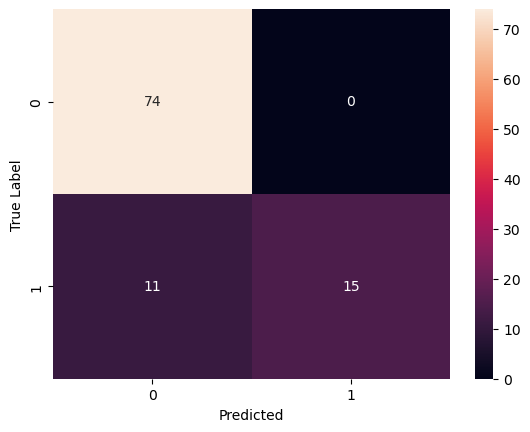

In [ ]:
test_predictions = model.predict(X_test)
test_predictions = model.predict(X_test)
test_predictions = (test_predictions > 0.5).astype("int32")  # If it's a binary classification task
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, test_predictions)
print(f"Accuracy: {accuracy:.2f}")
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
from sklearn.metrics import roc_auc_score

from sklearn.metrics import roc_auc_score

# Using the predict method for Keras models
test_probabilities = model.predict(X_test).ravel()

# Calculation of AUC-ROC
auc_roc = roc_auc_score(y_test, test_probabilities)
print(f"AUC-ROC: {auc_roc:.2f}")

from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, test_predictions)
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('True Label')
plt.show()

# 8 Results and Visualization:

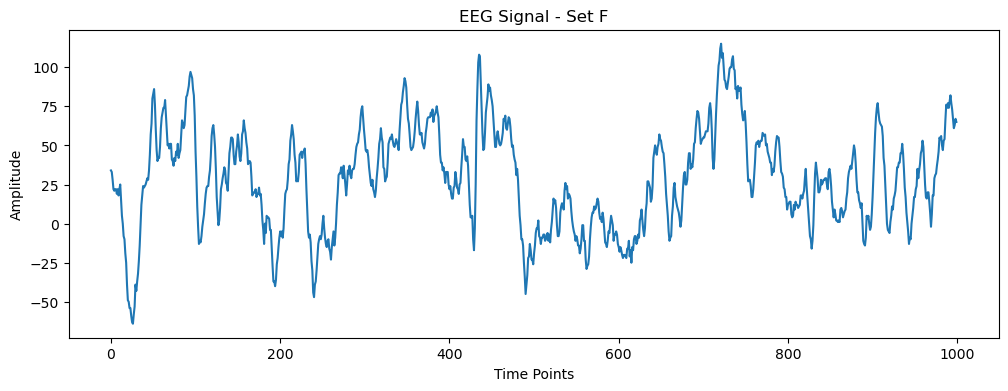

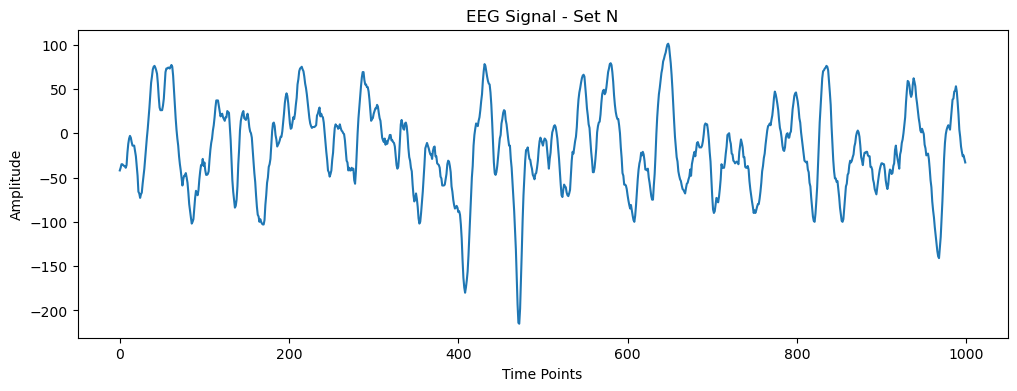

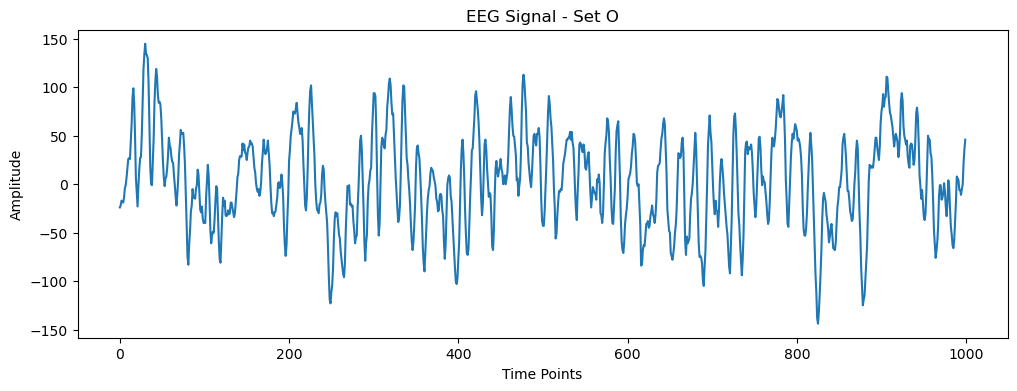

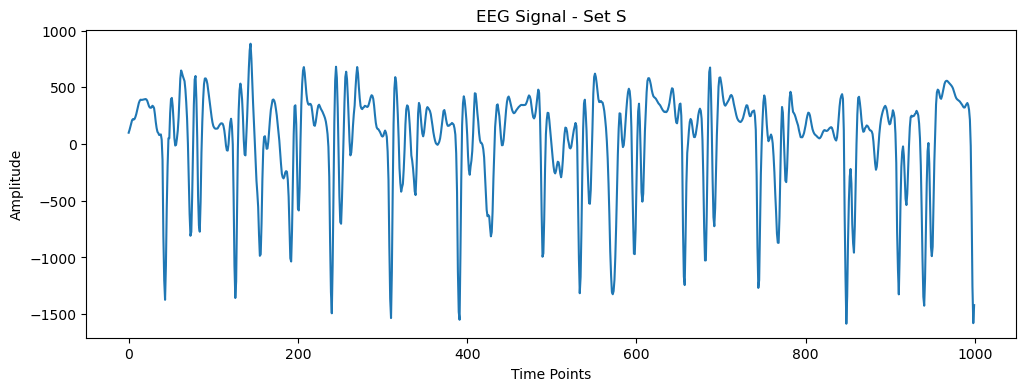

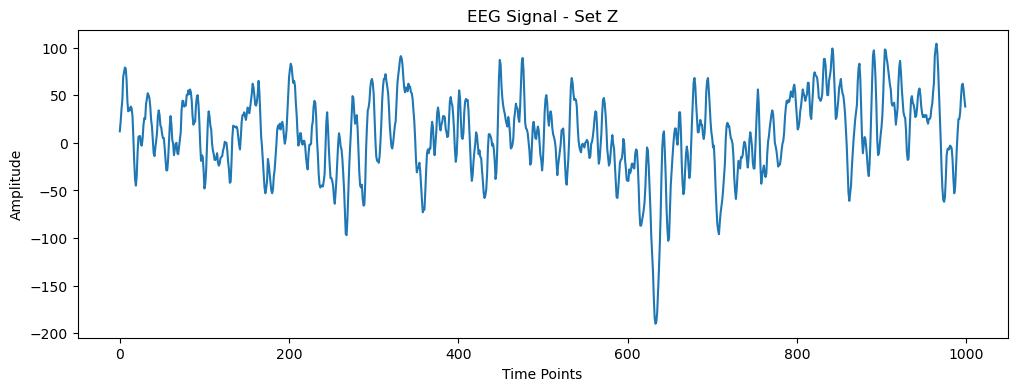

In [ ]:
import matplotlib.pyplot as plt

# List of EEG datasets
eeg_datasets = [eeg_data_set_f, eeg_data_set_n, eeg_data_set_o, eeg_data_set_s, eeg_data_set_z]
dataset_names = ['Set F', 'Set N', 'Set O', 'Set S', 'Set Z']

# Plotting a segment of EEG data from each set
for dataset, name in zip(eeg_datasets, dataset_names):
    plt.figure(figsize=(12, 4))
    plt.plot(dataset[0, :1000])  # Plotting the first 1000 points of the first sample
    plt.title(f"EEG Signal - {name}")
    plt.xlabel("Time Points")
    plt.ylabel("Amplitude")
    plt.show()


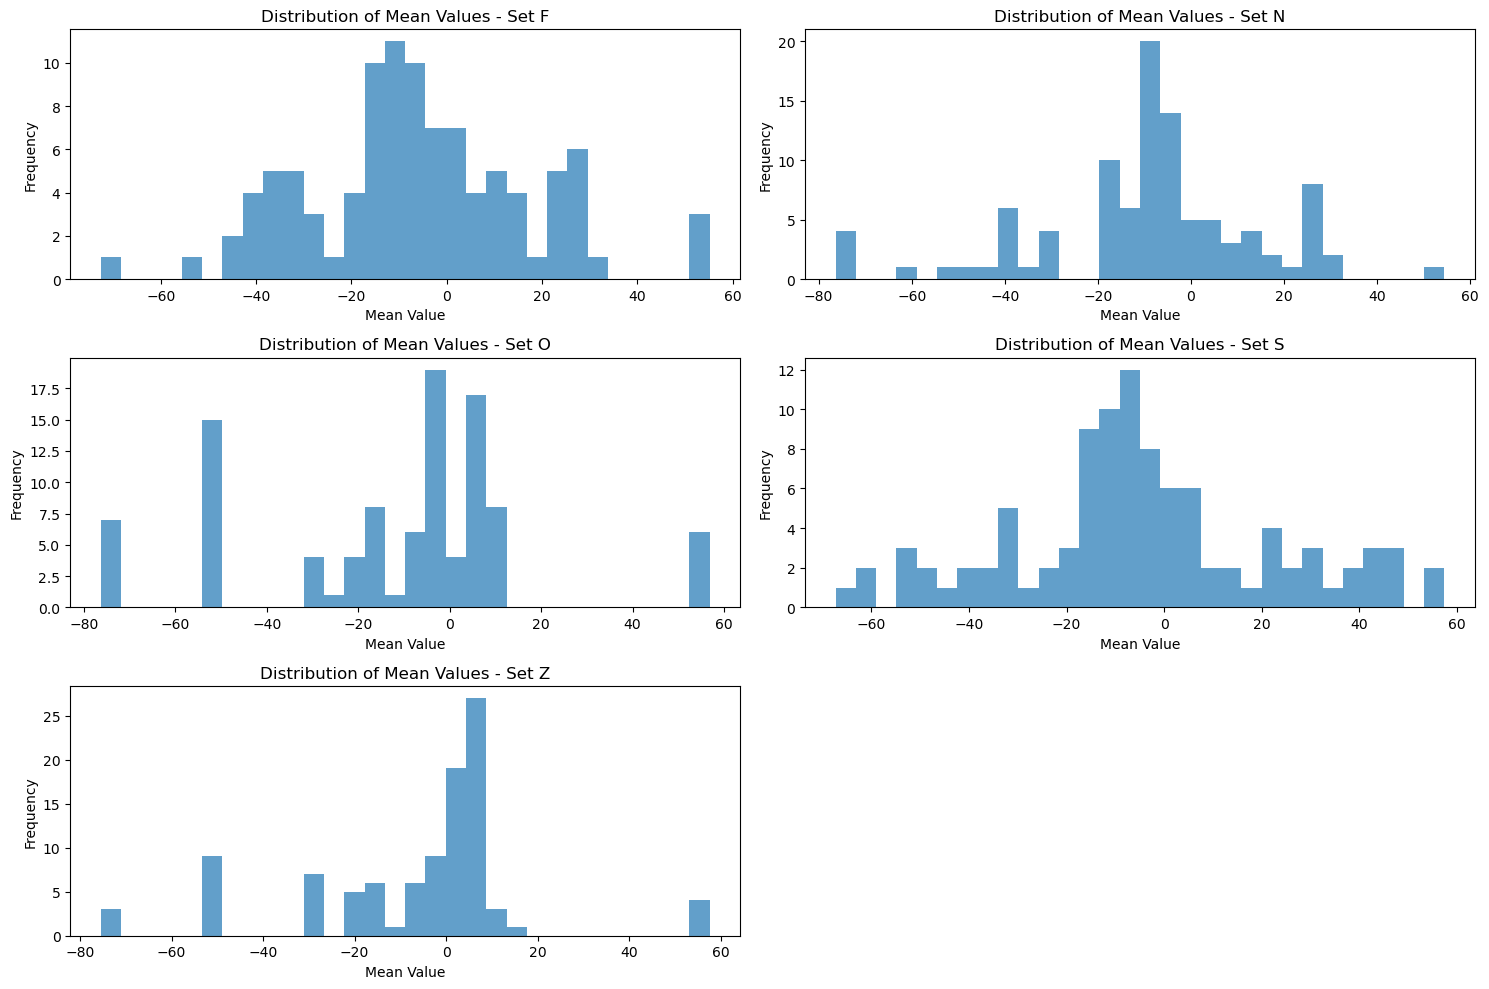

In [ ]:
import matplotlib.pyplot as plt

dataset_names = ['Set F', 'Set N', 'Set O', 'Set S', 'Set Z']

n_datasets = len(time_features_sets)

plt.figure(figsize=(15, 10))

for i, (time_features, name) in enumerate(zip(time_features_sets, dataset_names)):
    plt.subplot(3, 2, i + 1)
    plt.hist(time_features[:, 0], bins=30, alpha=0.7)
    plt.title(f"Distribution of Mean Values - {name}")
    plt.xlabel("Mean Value")
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


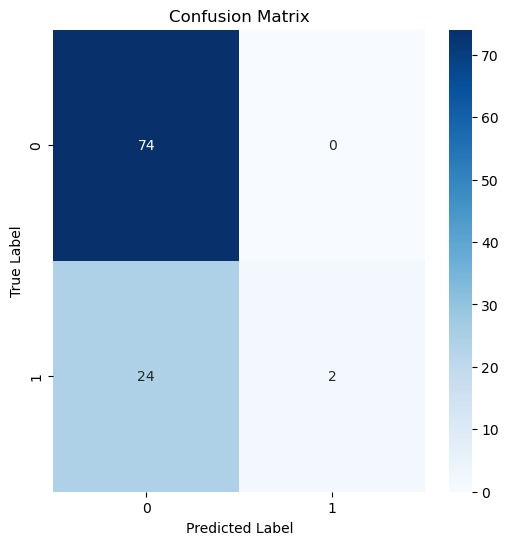

In [ ]:
predictions = logistic_model.predict(X_test)
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generating the confusion matrix
cm = confusion_matrix(y_test, predictions)

# Plotting the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

4/4 [==============================] - 0s 3ms/step


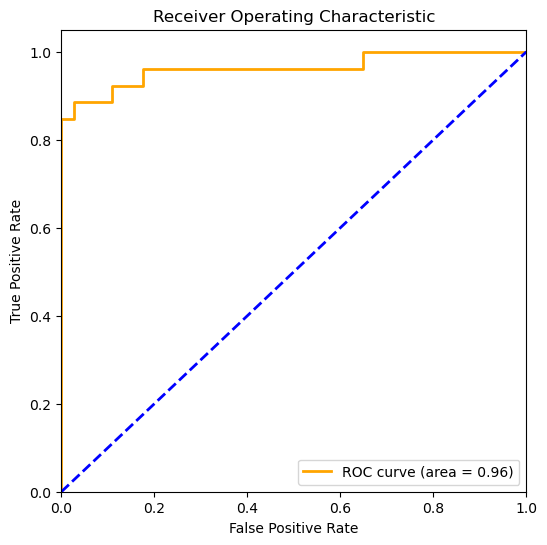

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# The model's 'predict' method returns the probability of the positive class
y_score = model.predict(X_test).ravel()
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# Plotting the ROC Curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='orange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

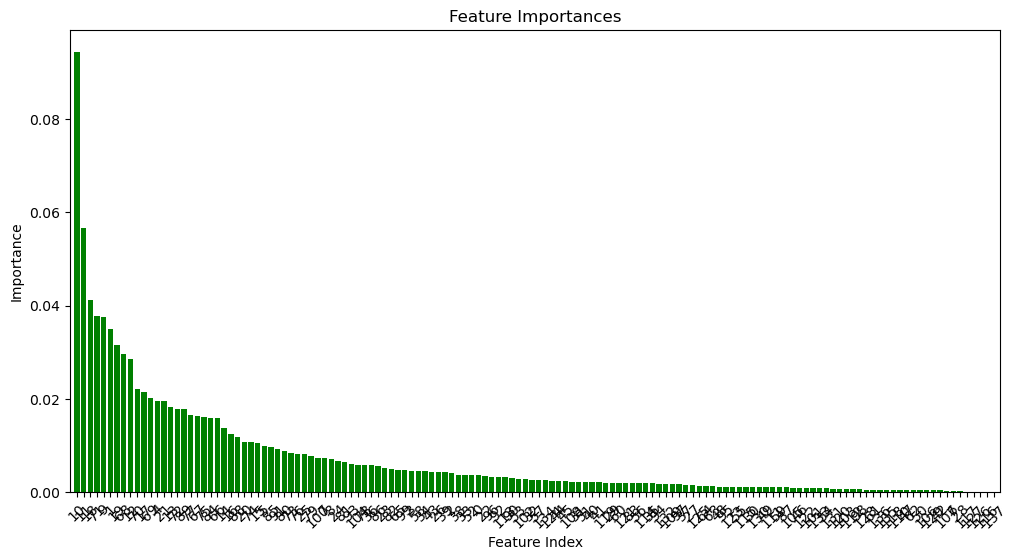

In [ ]:
import matplotlib.pyplot as plt


importances = random_forest_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], color="g", align="center")
plt.xticks(range(X_train.shape[1]), indices, rotation=45)
plt.xlim([-1, X_train.shape[1]])
plt.xlabel("Feature Index")
plt.ylabel("Importance")
plt.show()